# HW1

# Problem 1

p(M) is the probability to get a mango
p(A) the probability to get an orange
p(1) the probability to choose box 1 
p(2) the probability to choose box 2
\begin{align}
p(1) = 0.6\\
p(2) = 0.4\\
p(M|2) = 0.5\\
p(M|1) = 0.666
\end{align}
We can derive that:
\begin{align}
p(2|M) &= \frac{p(M| 2)p(2)}{p(M)}\\
& = \frac{p(M| 2)p(2)}{p(M|2)p(2) + p(M|1)p(1)}\\
& = 0.3333
\end{align}

# Problem 2

\begin{align}
E[x]  = & \int_{-\infty}^{\infty} x p(x) dx  \\
=& \int_{-\infty}^{\infty} [axp_1(x) + (1-\alpha) xp_2] dx \\
=& \alpha \int_{-\infty}^{\infty} xp_1(x) dx+ \int_{-\infty}^{\infty}(1-\alpha) xp_2 dx \\
=& a \mu_1 + (1- \alpha) \mu_2
\end{align}
Variance
\begin{align}
V[x]  = E[x^2] - (E[x])^2 (1) 
\end{align}
where 
\begin{align}
E[x^2] = & \int_{-\infty}^{\infty} x^2 p(x) dx\\
=& \int_{-\infty}^{\infty} \alpha x^2 p_1(x) + (1-\alpha) x^2 p_2(x) dx\\
=& \alpha \int_{-\infty}^{\infty}  x^2 p_1(x)dx +(1-\alpha)\int_{-\infty}^{\infty}  x^2 p_2(x) dx\\
=& \alpha ( \mu_1^2 + \sigma_1^2) + ( 1 - \alpha)(\mu_2^2 + \sigma_2^2)
\end{align}
The result can be derived by pluging in the above to equation (1).

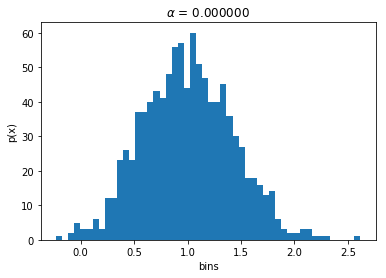

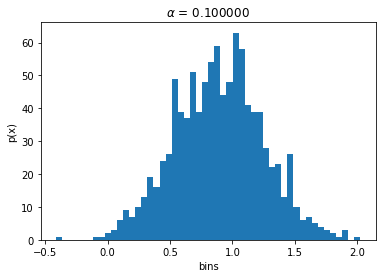

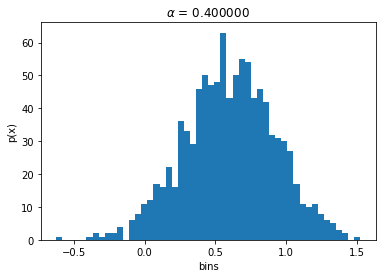

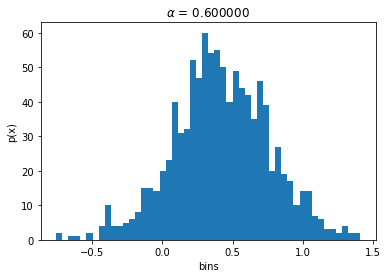

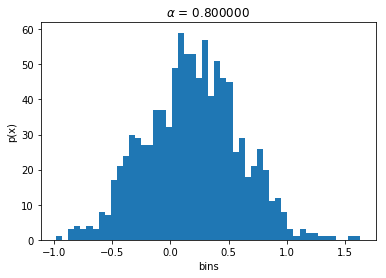

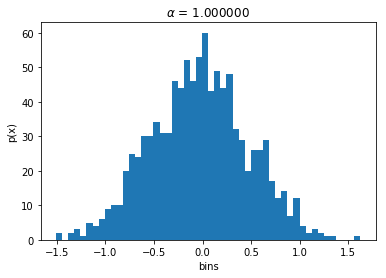

In [37]:
u = np.array([0., 1.])
std = np.array([0.5, 0.4])

a = np.array([0, 0.1, 0.4, 0.6, 0.8, 1])

std2 = 0.4
std1 = 0.5
mean1 = 0.
mean2 = 1.

for (i,alpha) in enumerate(a):
    p1 = np.random.normal(mean1, std1, 1000)
    p2 = np.random.normal(mean2, std2, 1000)
    p = alpha*p1 + (1.-alpha)*p2
    
    plt.figure(i)
    plt.hist(p, bins = 50)
    plt.xlabel('bins')
    plt.ylabel('p(x)')
    plt.title(r'$\alpha$ = %f' %alpha)

# Problem 3

Given a multivariate Gaussian distribution $\mathbf{x} \sim N(\mathbf{\mu}, \Sigma)$ where:
\begin{align}
\mathbf{\mu} = 
\begin{bmatrix}
    \mu_{1}  \\
    \mu_{2}      
\end{bmatrix}
\end{align}
and 
\begin{align}
\mathbf{\Sigma} = 
\begin{bmatrix}
    \Sigma_{11} & \Sigma_{12}  \\
    \Sigma_{21}  & \Sigma_{22}     
\end{bmatrix} 
\end{align}
The conditional distribution of the variable $x_{1}$ given $x_{2}$ of the above should be:
\begin{align}
\mu_{1|2} = \mu_{1} + \Sigma_{12}\Sigma_{22}^{-1}(x_{2} - \mu_{2})\\
\Sigma_{1|2} = \Sigma_{11} - \Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}\\
\end{align}
Thus: $x_{1}\sim N(\mu_{1|2}, \Sigma_{1|2})$

In this case, we can easily compute $x\sim N(0., 4.43)$.
It is also easy to get the marginal distribution of $x$ is $x\sim N(0., 5.)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy import stats

mean = [1., 0.]
cov = [[5., -2.], [-2., 7.]]

x, y = np.random.multivariate_normal(mean, cov, 1000).T
plt.plot(x, y, 'o')
plt.show()

<Figure size 640x480 with 1 Axes>

# Comparison of the joint p(x, y)

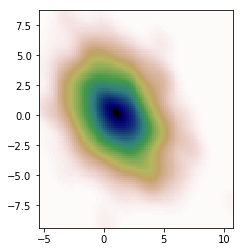

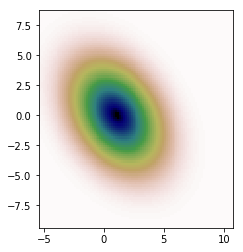

In [3]:
def p1(x,y):
    mean = [1., 0.]
    cov = [[5.0, -2.], [-2., 7.]]
    X = np.array([x, y])
    return multivariate_normal.pdf(X, mean=mean, cov=cov)

xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
prob1 = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        prob1[i, j] = p1(X[i,j], Y[i,j])

positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
#ax.plot(x, y, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

fig, ax = plt.subplots()
ax.imshow(np.rot90(prob1), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
#ax.plot(x, y, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

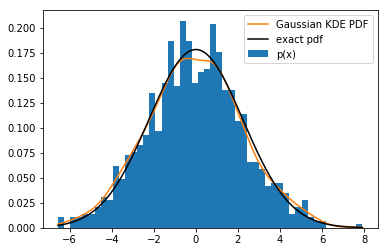

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
samples = 1000
m_xy = 0.
std_xy = 5.
x_m = np.random.normal(m_xy, np.sqrt(std_xy), samples)

x_mg = np.linspace(x_m.min(), x_m.max(), 1000)
margpdf = 1/np.sqrt(2*np.pi*5)*np.exp(-(x_mg**2)/(2*5))

x = np.random.normal(m_xy,np.sqrt(std_xy),samples)
kde_xm = gaussian_kde(x_m)


gkde = gaussian_kde(x)

plt.figure()
plt.hist(x_m, bins = 50, density = True, label = 'p(x)')
plt.plot(x_mg, kde_xm.evaluate(x_mg), label = 'Gaussian KDE PDF')
plt.plot(x_mg, margpdf, 'k', label = 'exact pdf')
plt.legend()

In [7]:
positions.shape

(1000,)

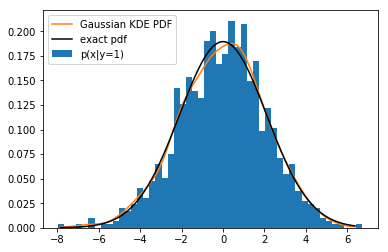

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

samples = 1000
m_xy = 0
std_xy = 4.43
x = np.random.normal(m_xy,np.sqrt(std_xy),samples)

gkde = gaussian_kde(x)
x_c = np.linspace(x_cond.min(), x_cond.max(), 1000)
xcond_pdf = 1/np.sqrt(2*np.pi*std_xy)*np.exp(-(x_condgrid**2)/(2*std_xy))

plt.figure()
plt.hist(x, bins = 50, density = True, label = 'p(x|y=1)')
plt.plot(x_c, gkde.evaluate(x_condgrid), label = 'Gaussian KDE PDF')
plt.plot(x_c, xcond_pdf, 'k', label = 'exact pdf')
plt.legend()

# Problem 4

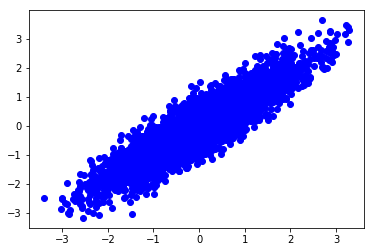

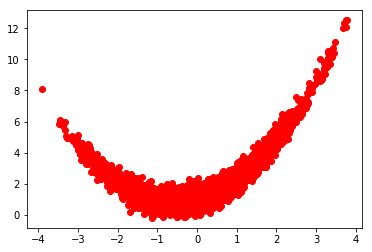

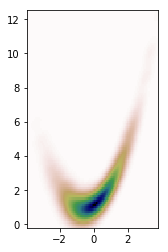

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

mean = [0, 0]
cov = [[1., 0.9], [0.9, 1]]

x1, x2 = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x1, x2, 'bo')
plt.show()

alpha = 1.15
beta = 0.8
y1 = alpha * x1
y2 = x2 / alpha + beta * (x1**2 + alpha**2)
plt.plot(y1, y2, 'ro')
plt.show()

xmin = y1.min()
xmax = y1.max()
ymin = y2.min()
ymax = y2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([y1, y2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
#ax.plot(y1, y2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [6]:
ymean1 = y1.mean()
ymean2 = y2.mean()
print(ymean1)
print(ymean2)

0.005849595039850458
1.8580878094241853
